**Project title**: 3D print under-extrusion detection using image processing.  

**Application domain**: Robotics

## Part A - Application area review

Rapid technological progress has revolutionised various industries, including manufacturing and prototyping.  An innovation that has gained considerable attention is 3D printing. 3D printing, also known as additive manufacturing, allows for the production of three-dimensional objects by sequentially depositing materials in layers according to a digital model. Although the use of 3D printers is increasing, 3D printers are prone to various issues and errors. Even a small error during printing can result in a significant loss of time and resources.  

Timely identification of these errors enables users to intervene and rectify the issue during printing and avert the need to restart the printing process, preventing the wastage of printing materials and time. One such common error related to 3D printing is under-extrusion. Under-extrusion in 3D printing is caused by insufficient filament deposition by the printer during printing (in FDM 3D printers). It results in poor print quality and reduced structural strength and surface finish. In recent years, researchers have attempted to detect 3d printer extrusion-related issues of several printing technologies using various machine-learning techniques. The following table contains details about the machine-learning methods used by researchers.

| Citation | Description | Techniques used |
|----------|----------|----------|
| (Zhang, Fidan and Allen, 2020) | This study proposed a method for increasing the efficiency of FDM 3D printing by identifying 3d print failures early on in the printing process. They have used images captured by a camera and a deep learning model to predict various extrusion-related issues of 3d prints. They were able to achieve an overall accuracy of 70%. | Convolutional Neural Network (CNN) |
|(Farhan Khan et al., 2021) | This paper proposed a CNN-based method for identifying various 3d print issues, including under extrusion, using images captured from a camera during printing. They were able to achieve an accuracy of 84%. | CNN |
| (Lut et al., 2023) | This study compares the effectiveness of different YOLOv5 models for detecting under-extortion in FDM 3D printers. They were able to achieve 99% accuracy by using the YOLOv5xl model | CNN (VGG-16) |
| (Gobert et al., 2018) | This paper proposed an SVM-based methodology for detecting print defects in laser-powder bed fusion (L-PBF) printers. They used CT scan data to train the classifier and used images from a DSLR camera for defect detection during printing. They were able to achieve an accuracy of 80%. | Support Vector Machine (SVM) |
|  (Ye et al., 2018) | This paper proposed a method to detect defects in selective laser melting (SLM) prints using acoustic signals during printing. They achieved an accuracy of 95% using a DBN model. | Deep Belief Network (DBN), SVM |
| (Okaro et al., 2019) | This paper proposed a method to identify the quality of the L-PBF printed parts using data gathered from 2 photodiodes during printing.  They used a semisupervised approach and achieved an accuracy of 77%. | Gaussian Mixture Model (GMM) |
| (Khanzadeh et al., 2018) | This study evaluated various supervised machine learning algorithms for the real-time identification of melt pool abnormalities of L-PBF prints by images captured by an infrared camera. KNN model achieved the best accuracy of 98%. | Decision Tree (DT), K-Nearest Neighbor (KNN), SVM, Discriminant Analysis (DA) |
| (Bacha, Sabry and Benhra, 2019) | This paper proposed a methodology for predicting print failures of FDM printers using data from various sensors (temperature, current, voltage of stepper motors and drivers and limit switch data). They achieved an accuracy of 98% using the Bayesian network model. | Naïve Bayes, Bayesian Network |



## Part B – Compare and evaluate AI techniques 

From the abovementioned techniques utilised by other researchers, CNN, SVM, and KNN techniques are compared and evaluated in the table below.

| Algorithm | Strengths | Weaknesses | Advantages | Disadvantages | Input data | Output data |
|----------|----------|----------|----------|----------|----------|----------|
| Convolutional Neural Network (CNN) | CNN can learn features automatically from input data, making them excel in image recognition. CNNs inherently capture spatial hierarchies of the input data, allowing them to model complex problems. | CNN requires a large amount of data for training. CNN model training is computationally expensive and time-consuming. | CNNs are efficient in image processing tasks and provide high accuracies. Transfer learning enables the building of new models efficiently using pre-trained models. | Require a large amount of data for training. Optimising hyperparameters can be a challenging task. | CNNs are predominantly utilised for image-related tasks, and the input will be a matrix of pixel values. In 3d printing failure detection, CNNs have been used with image data. | For image classification, the output will be probabilities for each class. |
| Support Vector Machine (SVM) | Exhibit strong performance in feature spaces with high dimensions. Have the ability to deal with non-linear decision boundaries. | SVMs are sensitive to outliers. Selecting an optimal kernel function is challenging. | SVMs can be used in both classification and regression problems. SVMs are effective for high-dimensional data | Selecting an optimal kernel is a challenging task. Training time can be significant with large datasets. | Capable of handling both numerical and categorical data. In 3d print failure detection SVMs have been used with image and acoustic signal data. | Output depends on the task. For classification, the output will be the class label. For regression, the predicted value for the input. |
| K-Nearest Neighbor (KNN) | Simple and easy to implement. Doesn't have a training phase. | Sensitive to outliers. Can cause significant computational costs during the prediction phase. | Easy to implement and understand. | Sensitive to outliers and noisy data. Does not work well with large datasets. | Capable of handling both numerical and categorical data. In 3d printing failure detection, KNN have been used with image data. | Output depends on the task. For classification, the output will be the class label. For regression, the predicted value for the input. |


In the domain of 3D print failure detection ML techniques such as CNN, SVM, KNN, GMM, DBN, and Decision Trees have been explored with several input data types. When failure detection using image data is considered CNN has shown promising results compared to other techniques (Lut et al., 2023) (Farhan Khan et al., 2021). Because of that, the author decided to implement the prototype using CNN.

## Part C – Implementation

### High-level diagram


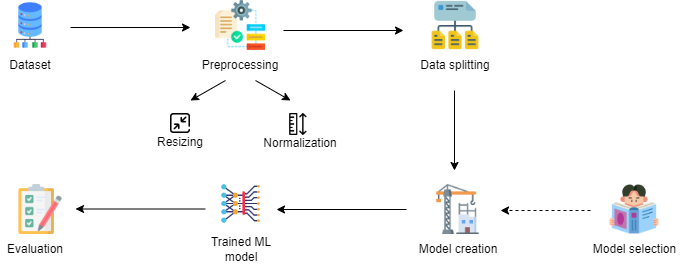

[High-level diagram](https://drive.google.com/file/d/126doQVN5B3Wk8UDxdZOMhX1B1MAOWE5U/view?usp=sharing)

### 1. Installing dependencies

In [1]:
%pip install tensorflow opencv-python matplotlib seaborn seaborn[stats]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Odhith Senevirathne\Desktop\ImageClassification\aivision\Scripts\python.exe -m pip install --upgrade pip


In [2]:
# Importing necessary libraries
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
import pandas as pd
import itertools

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

### 2. Dataset

The data set used in this study was available publicly on Kaggle. It contained 81, 060 images  of size 256 x 256, belonging to 2 classes: normal and underextrution. The images were taken from a camera mounted near the 3D printer nozzle. Because it was difficult to compute that number of images 10,000 images were taken from the dataset for the study. The graph below visualises the data distribution between the 2 classes of the new dataset. 

Source: [Early detection of 3D printing issues](https://www.kaggle.com/datasets/gauravduttakiit/early-detection-of-3d-printing-issues-256256)

In [3]:
#Loading the dataset (data pipeline)
tf.random.set_seed(123)
img_data = tf.keras.utils.image_dataset_from_directory('data', seed=123)

Found 10000 files belonging to 2 classes.


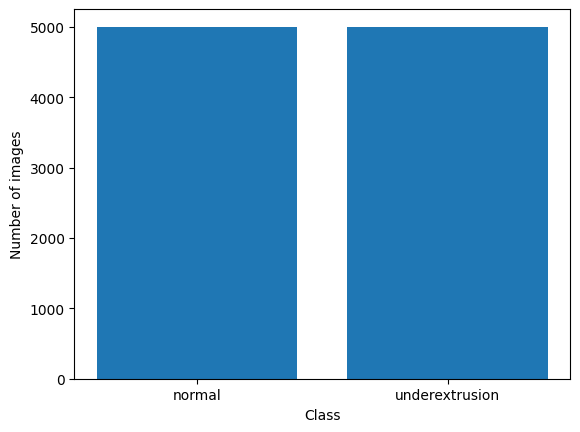

In [4]:
# Plotting number of images in each class
labels, counts = np.unique(np.concatenate(tuple(img_data.map(lambda x, y: y))), return_counts=True)
label_mapping = {1: 'underextrusion', 0: 'normal'}
labels_names = np.array([label_mapping[label] for label in labels])

plt.bar(labels_names, counts)
plt.ylabel('Number of images')
plt.xlabel('Class')
plt.show()

In [5]:
# Number of images in each class 
x = np.array(labels_names)
y = np.array(counts)
df = pd.DataFrame({"Class": x, "No.of images": y})
df.set_index("Class", inplace=True)
print(df)

                No.of images
Class                       
normal                  5000
underextrusion          5000


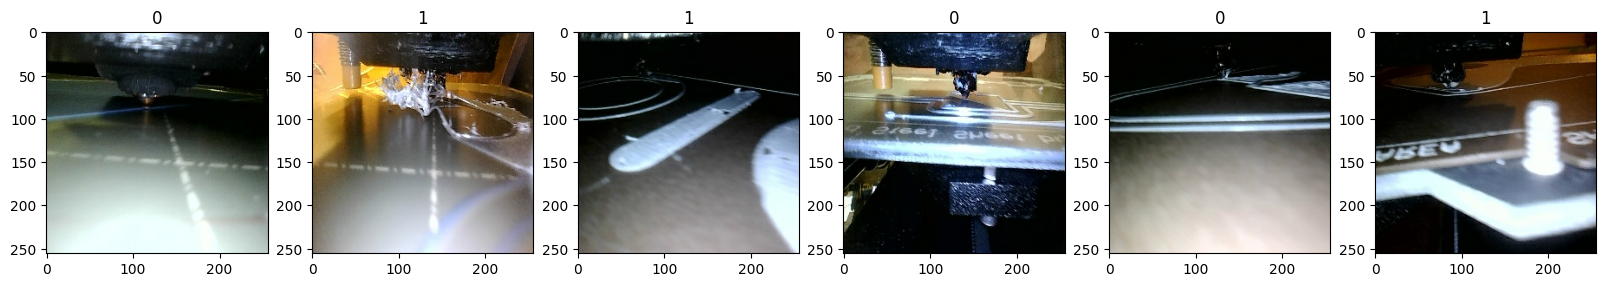

In [6]:
#Exploring the dataset
data_iterator = img_data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

### 3.Data preprocessing

Data preprocessing is a crucial step in building an ML model. The following techniques were applied to the dataset during preprocessing.
1. Image resizing - Resizing images to 256 x 256.
2. Normalization - Pixel values are normalized to be in the range of 0 to 1.


In [7]:
# Image data has been already resized to 256 x 256 by the "tf.keras.utils.image_dataset_from_directory ()" method.
# Normalization
scaled_data = img_data.map(lambda x,y: (x/255, y))

In [8]:
# Check for max and min values
scaled_data_iterator = scaled_data.as_numpy_iterator()
scaled_batch = scaled_data_iterator.next()
print (f'Max: {scaled_batch[0].max()}, Min: {scaled_batch[0].min()}')

Max: 1.0, Min: 0.0


#### Data Splitting

The preprocessed data above is divided into three sets: training, validation, and testing. 80% of the data is allocated for training, 10% is allocated for validation, and 10% is allocated for testing (80:10:10 ratio).

In [9]:
# number of batches
batch_size = scaled_data.cardinality().numpy()

# split ratio
train_split = 0.8
val_split = 0.1
# test split will be 0.1

training_size = int(batch_size * train_split)
validation_size = int(batch_size * val_split)

scaled_data = scaled_data.shuffle(buffer_size=batch_size, seed=123)

train_dataset = scaled_data.take(training_size)
remaining_set = scaled_data.skip(training_size)
validation_dataset = remaining_set.take(validation_size)
testing_dataset = remaining_set.skip(validation_size)

### 4. Model Building

The prototype will be implemented as a CNN model for the reasons provided in the compare and evaluate section above. Models with different architectures (adding data augmentation, adding dropout layer, different epochs, different layers) were created to find the best-performing model.

In [10]:
# data_augmentation = keras.Sequential(
#   [
#     layers.RandomFlip("horizontal", input_shape=(256,256,3)),
#     layers.RandomZoom(0.1),
#   ]
# )

In [11]:
# Creating the model
model = Sequential([
    layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), 1, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (3,3), 1, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
# Compiling the model
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 5.Training

In [14]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [15]:
epochs=8
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[tensorboard_callback])

Epoch 1/8


250/250 [==============================] - 85s 304ms/step - loss: 0.1929 - accuracy: 0.9140 - val_loss: 0.0610 - val_accuracy: 0.9778
Epoch 2/8
250/250 [==============================] - 83s 305ms/step - loss: 0.0494 - accuracy: 0.9831 - val_loss: 0.0182 - val_accuracy: 0.9928
Epoch 3/8
250/250 [==============================] - 83s 306ms/step - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.0168 - val_accuracy: 0.9950
Epoch 4/8
250/250 [==============================] - 85s 313ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0170 - val_accuracy: 0.9950
Epoch 5/8
250/250 [==============================] - 84s 304ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 5.6644e-04 - val_accuracy: 1.0000
Epoch 6/8
250/250 [==============================] - 83s 304ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/8
250/250 [==============================] - 83s 303ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0018 - val_acc

#### Training performance

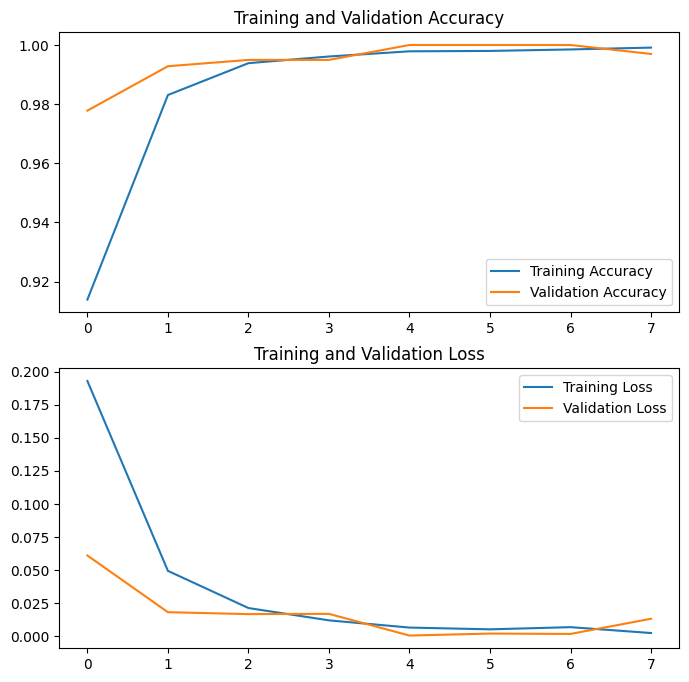

In [16]:
#Plotting validation loss and accuracy compared to training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part D – Testing and Evaluation

The following metrics were used to evaluate the implemented model.
1. Accuracy - The proportion of accurately classified instances out of the total instances.
2. Precision - The ratio of correctly classified positive instances to the total instances classified as positive.
3. Recall - The ratio of correctly classified positive instances to actual positive instances.
4. F1 score - The average of precision and recall.


In [17]:
# Predictions for testing set
test_labels = []
predictions = []
threshold = 0.5

for batch in testing_dataset.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    for i in y:
        test_labels.append(i)
    for i in yhat:
        predictions.append((i[0] >= threshold).astype(int))

1/1 [==============================] - 0s 95ms/step


In [18]:
#Evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='binary')
recall = recall_score(test_labels, predictions, average='binary')
f1 = f1_score(test_labels, predictions, average='binary')

print(f'Accuracy: {accuracy}\nPresision: {precision}\nRecall: {recall}\nF1_score: {f1}')

Accuracy: 0.99609375
Presision: 0.9921259842519685
Recall: 1.0
F1_score: 0.9960474308300395


The accuracy of the implemented model is 99.6%.  A high accuracy shows that the model is performing well in the overall classification of images.

The precision of the model implemented model is 99.2%. A high precision indicates that the model has a low false positive rate. This means when the model predicts that the printer is under-extruding, it is most likely correct.

The recall of the model is 100%. A high recall indicates that the model effectively identifies most of the under-extrusion instances. A high recall value is important for a 3d print failure detection model where classifying a positive instance as negative can cause issues.

The F1 score of the model is 99.6%. A high  F1 score indicates a good balance between precision and recall.


#### Confusion matrix

The confusion matrix summarizes a classification algorithm's performance by presenting the number of true positive, false positive, true negative, and false negative predictions. In this case, it is a 2x2 matrix since this is a binary classification problem.

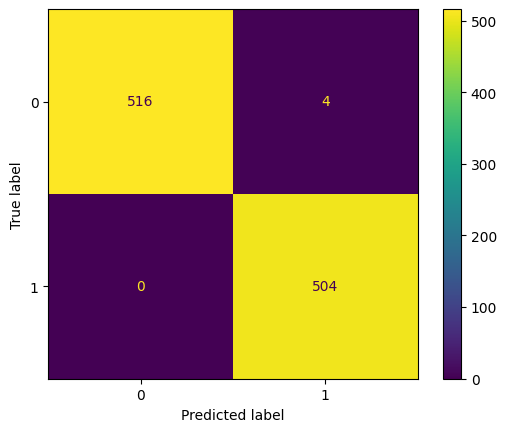

In [19]:
# confusion matrix
%matplotlib inline
cm = confusion_matrix(y_true=test_labels, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The upper left-hand corner of the confusion matrix (CM) represents the number of negative instances predicted as negative. In the context of this problem, it represents the number of actual normal instances that have been classified as normal by the model.  Out of  520 normal samples, it has classified 516 as normal. The upper right-hand corner of the CM matrix represents the number of actual normal instances that have been classified as under-extrusion, which is 4. Although false positives are not ideal, in the context of 3D printing failure prediction, users of the model might get false notifications. It would not cause any critical issues related to the object that is being printed. This issue has to be addressed if the print cancellation or print pausing action is automated with the help of this model without any human intervention.

The lower right-hand corner of the CM represents the number of actual under-extrusion instances that have been classified as under-extrusion by the model. Out of 504 actual under-extrusion samples, it has classified 504 as under-extrusion. The lower left-hand corner of the CM represents the number of actual under-extrusion samples that have been classified as normal, which is 0. Concerning 3d print under-extrusion detection, detecting an actual under-extrusion sample as normal can cause issues. It will waste both printing time and printing material.


#### Saving the Model

In [28]:
# Saving the model
model.save('cnn_model.keras')

In [3]:
# Loading the saved model
new_model = tf.keras.models.load_model('cnn_model.keras')
#new_model.summary()

In [4]:
#function to predict the class
def classify_prediction(model_prediction, threshold_value=0.5):
    if model_prediction >= threshold_value:
        return 'Predicted class is under-extrusion'
    else:
        return 'Predicted class is normal'

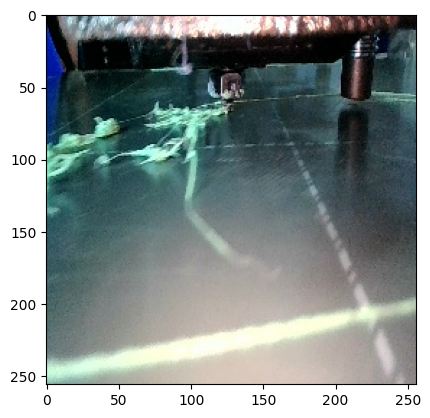

1/1 [==============================] - 0s 177ms/step


In [5]:
input_image = cv2.imread('A.jpg')
resized_input = tf.image.resize(input_image, (256,256))
plt.imshow(resized_input.numpy().astype(int))
plt.show()
model_prediction = new_model.predict(np.expand_dims(resized_input/255, 0))

In [6]:
print (classify_prediction(model_prediction))

Predicted class is under-extrusion


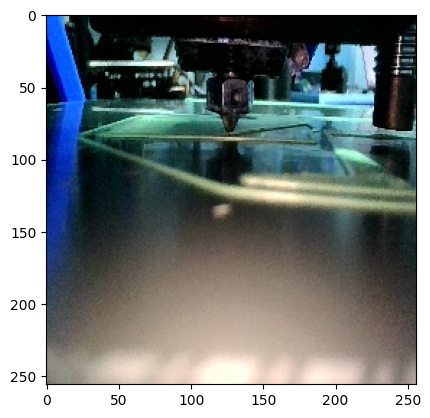

1/1 [==============================] - 0s 51ms/step


In [7]:
input_image = cv2.imread('B.jpg')
resized_input = tf.image.resize(input_image, (256,256))
plt.imshow(resized_input.numpy().astype(int))
plt.show()
model_prediction = new_model.predict(np.expand_dims(resized_input/255, 0))

In [8]:
print (classify_prediction(model_prediction))

Predicted class is normal


## Part E – Evaluation

#### Expected result vs actual result

In [14]:
# Testing the implemented model
normal_path = r'experiment\normal'
underextrusion_path = r'experiment\underextrusion'

def predict_class(folder_path, expected_class):
    all_files = os.listdir(folder_path)
    for file_name in all_files:
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            input_image = cv2.imread(file_path)
            resized_input = tf.image.resize(input_image, (256, 256))
            input_tensor = np.expand_dims(resized_input / 255, 0)
            model_prediction = new_model.predict(input_tensor)
            threshold_value = 0.5
            prediction = ''
            if model_prediction >= threshold_value:
                prediction = 'under-extrusion'
            else:
                prediction = 'normal'

            print(f"     {expected_class} | {prediction} | {'Pass' if prediction == expected_class else 'Fail'}")

print('Expected result |  Actual result | Pass/ Fail\n')
predict_class(normal_path, 'normal')
predict_class(underextrusion_path, 'under-extrusion')

Expected result |  Actual result | Pass/ Fail

1/1 [==============================] - 0s 37ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 39ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 33ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 44ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 32ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 30ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 29ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 43ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 33ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 39ms/step
     normal | normal | Pass
1/1 [==============================] - 0s 52ms/step
     under-extrusion | under-extrusion | Pass
1/1 [==============================] - 0s 57ms/step
   

From the results of the above experiment as well as the confusion matrix, we can conclude that the implemented model performs well in predicting 3d print under-extrutions.

#### Comparison of techniques

The table below compares the accuracy of the models in related literature.

| Citation | Technique | Accuracy |
|----------|----------|----------|
| (Zhang, Fidan and Allen, 2020) | CNN | 70% |
| (Farhan Khan et al., 2021) | CNN | 84% |
| (Lut et al., 2023) | CNN (VGG-16) | 99% |
| (Gobert et al., 2018) | SVM | 80% |
| (Khanzadeh et al., 2018) | KNN | 98% |

The implemented model was able to achieve an accuracy of 99.6%, which is similar to the model implemented by (Lut et al., 2023). And perform better than other models. However, the comparison of accuracies isn’t consistent because the datasets they were evaluated on are different. But in general, it shows that CNN models perform better in 3d print error detection compared to other techniques.


#### Pros and cons of the selected technique

| Pros | Cons | 
|----------|----------|
| Can learn features automatically from input data, making them excel in image recognition | Model training is computationally expensive and time-consuming. |
| Usually yield high accuracy with minimum effort. | Hyperparameter tuning is time-consuming. |
| In the context of 3D printing, images are easy to obtain since most printers contain prebuilt cameras for monitoring the printing progress. | The trained model might be specialized for the particular printer that was used to create the dataset. |


## References

Bacha, A., Sabry, A.H. and Benhra, J. (2019). Fault Diagnosis in the Field of Additive Manufacturing (3D Printing) Using Bayesian Networks. International Journal of Online and Biomedical Engineering (iJOE), 15 (03), 110. Available from https://doi.org/10.3991/ijoe.v15i03.9375.

Build a Deep CNN Image Classifier with ANY Images. (2022). Directed by Nicholas Renotte. Available from https://www.youtube.com/watch?v=jztwpsIzEGc [Accessed 8 January 2024].

Farhan Khan, M. et al. (2021). Real-time defect detection in 3D printing using machine learning. Materials Today: Proceedings, 42, 521–528. Available from https://doi.org/10.1016/j.matpr.2020.10.482.

Gobert, C. et al. (2018). Application of supervised machine learning for defect detection during metallic powder bed fusion additive manufacturing using high resolution imaging. Additive Manufacturing, 21, 517–528. Available from https://doi.org/10.1016/j.addma.2018.04.005.

Image classification | TensorFlow Core. (no date). TensorFlow. Available from https://www.tensorflow.org/tutorials/images/classification [Accessed 8 January 2024].

Khanzadeh, M. et al. (2018). Porosity prediction: Supervised-learning of thermal history for direct laser deposition. Journal of Manufacturing Systems, 47, 69–82. Available from https://doi.org/10.1016/j.jmsy.2018.04.001.

Lut, M. et al. (2023). YOLOv5 Models Comparison of Under Extrusion Failure Detection in FDM 3D Printing. 2023 IEEE International Conference on Automatic Control and Intelligent Systems (I2CACIS). 17 June 2023. Shah Alam, Malaysia: IEEE, 39–43. Available from https://doi.org/10.1109/I2CACIS57635.2023.10193388 [Accessed 1 January 2024].

Okaro, I.A. et al. (2019). Automatic fault detection for laser powder-bed fusion using semi-supervised machine learning. Additive Manufacturing, 27, 42–53. Available from https://doi.org/10.1016/j.addma.2019.01.006.

Ye, D. et al. (2018). Defect detection in selective laser melting technology by acoustic signals with deep belief networks. The International Journal of Advanced Manufacturing Technology, 96 (5–8), 2791–2801. Available from https://doi.org/10.1007/s00170-018-1728-0.

Zhang, Z., Fidan, I. and Allen, M. (2020). Detection of Material Extrusion In-Process Failures via Deep Learning. Inventions, 5 (3), 25. Available from https://doi.org/10.3390/inventions5030025.
